In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function for computing gradients
def compute_gradient(X, y, theta):
    return (1 / len(y)) * X.T.dot(X.dot(theta) - y)

# Gradient Descent (GD)
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for iteration in range(n_iterations):
        gradients = compute_gradient(X, y, theta)
        theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, theta, learning_rate, n_iterations):
    for iteration in range(n_iterations):
        for i in range(len(y)):
            random_index = np.random.randint(len(y))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Mini-Batch Gradient Descent (Mini-Batch GD)
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_iterations, batch_size):
    for iteration in range(n_iterations):
        indices = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, len(y), batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = compute_gradient(xi, yi, theta)
            theta -= learning_rate * gradients
    return theta


In [3]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear function with noise

# Hyperparameters
learning_rate = 0.1
n_iterations = 100
tol = 1e-6  # Tolerance for convergence
batch_size = 10  # For Mini-Batch GD

# Initialize weights
theta_gd = np.random.randn(2, 1)
theta_sgd = np.random.randn(2, 1)
theta_mbgd = np.random.randn(2, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 for bias term

Final theta using Gradient Descent: [3.90668931 3.04241987]
Final theta using Stochastic Gradient Descent: [4.29361114 2.8015292 ]
Final theta using Mini-Batch Gradient Descent: [4.23529453 2.79676194]


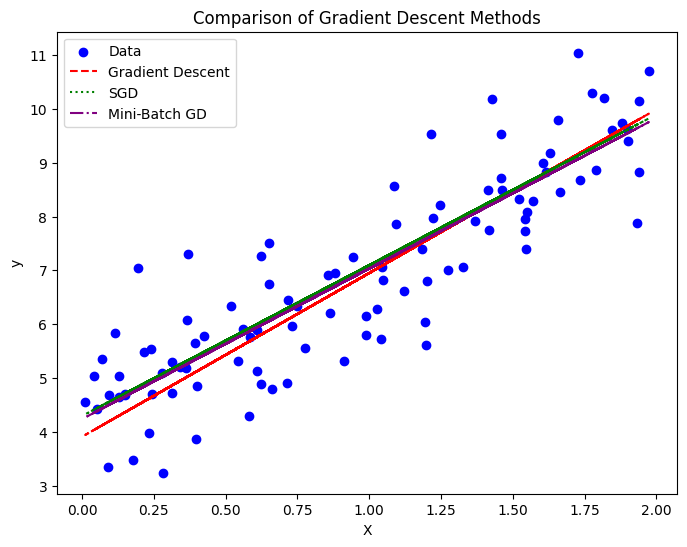

In [4]:
# Run the optimizations
theta_gd = gradient_descent(X_b, y, theta_gd, learning_rate, n_iterations)
theta_sgd = stochastic_gradient_descent(X_b, y, theta_sgd, learning_rate, n_iterations)
theta_mbgd = mini_batch_gradient_descent(X_b, y, theta_mbgd, learning_rate, n_iterations, batch_size)

# Print results
print("Final theta using Gradient Descent:", theta_gd.flatten())
print("Final theta using Stochastic Gradient Descent:", theta_sgd.flatten())
print("Final theta using Mini-Batch Gradient Descent:", theta_mbgd.flatten())

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(theta_gd), label='Gradient Descent', linestyle='dashed', color='red')
plt.plot(X, X_b.dot(theta_sgd), label='SGD', linestyle='dotted', color='green')
plt.plot(X, X_b.dot(theta_mbgd), label='Mini-Batch GD', linestyle='dashdot', color='purple')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Gradient Descent Methods')
plt.show()